In [1]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [23]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60, 22995.00, 22732.25]


In [24]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-18/Oct-31-2024-12-44-59_0.9742846795152619_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 30])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [25]:
output_trimmed_vmic

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-18_clean.txt,22617.20,22616.4,22618.0,0.3706,0.0,0.6328,4.0,1.0,0.0,15.715453,393.8167,0,0
5,ASAS-RCB-18_clean.txt,22718.90,22717.5,22720.3,-2.5000,0.0,0.3247,4.0,1.0,0.0,29.297060,252.1969,0,10010000
6,ASAS-RCB-18_clean.txt,22728.25,22727.0,22729.5,-2.5000,0.0,0.4029,4.0,1.0,0.0,9.043297,377.5361,0,10000000
7,ASAS-RCB-18_clean.txt,22730.40,22729.3,22731.5,-2.5000,0.0,0.4833,4.0,1.0,0.0,24.210687,279.4726,0,10000000
9,ASAS-RCB-18_clean.txt,22747.75,22746.5,22749.0,-2.4684,0.0,0.5444,4.0,1.0,0.0,25.104811,296.7355,0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,ASAS-RCB-18_clean.txt,23338.25,23336.5,23340.0,0.0789,0.0,0.4922,8.0,1.0,0.0,13.041124,312.5814,0,1000000
169,ASAS-RCB-18_clean.txt,23414.70,23413.7,23415.7,-0.2282,0.0,0.5079,8.0,1.0,0.0,2.620257,270.7654,0,0
170,ASAS-RCB-18_clean.txt,23417.80,23416.7,23418.9,-2.5000,0.0,0.6585,8.0,1.0,0.0,3.678673,343.2988,0,10000000
172,ASAS-RCB-18_clean.txt,24019.20,24017.9,24020.5,-2.5000,0.0,0.3525,8.0,1.0,0.0,10.896409,293.7272,0,10000000


4.0 0.000384673157070185 15
5.0 0.00027006999381401796 20
6.0 0.00015028470329684935 22
7.0 4.5247269912951285e-05 23
8.0 -1.9574519346609605e-05 23


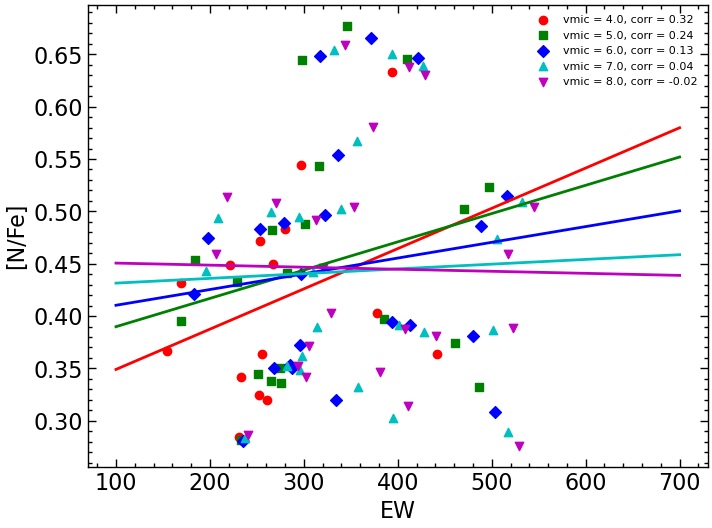

In [28]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_trimmed3 = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_trimmed3["ew"])
    nfes = np.array(output_trimmed3["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.abs(nfes - mean_nfe) < 3*std_nfe)
    choose_idxs = choose_idxs[0]
    choose_idxs2 = np.where(ews[choose_idxs] >17)
    choose_idxs2 = choose_idxs2[0]
    choose_idxs = choose_idxs[choose_idxs2]
    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(100, 700, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [22]:
output_trimmed3

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
134,ASAS-RCB-18_clean.txt,22598.75,22597.50,22600.0,-1.6806,0.0,1.0492,8.0,1.0,0.0,15.244812,652.1043,0,0
135,ASAS-RCB-18_clean.txt,22617.20,22616.40,22618.0,0.3941,0.0,0.6301,8.0,1.0,0.0,5.751796,428.4487,0,0
138,ASAS-RCB-18_clean.txt,22663.50,22662.00,22665.0,-1.5633,0.0,0.6381,8.0,1.0,0.0,8.799428,411.5121,0,0
143,ASAS-RCB-18_clean.txt,22718.90,22717.50,22720.3,-2.5000,0.0,0.4032,8.0,1.0,0.0,9.305451,329.0820,0,10000000
144,ASAS-RCB-18_clean.txt,22728.25,22727.00,22729.5,-2.5000,0.0,0.3872,8.0,1.0,0.0,10.442787,407.2893,0,10000000
145,ASAS-RCB-18_clean.txt,22730.40,22729.30,22731.5,-2.5000,0.0,0.5038,8.0,1.0,0.0,2.173744,352.8645,0,10000000
146,ASAS-RCB-18_clean.txt,22732.25,22731.50,22733.0,-1.9548,0.0,0.7266,8.0,1.0,0.0,3.125926,167.2245,0,0
147,ASAS-RCB-18_clean.txt,22743.50,22742.00,22745.0,-1.8135,0.0,0.3470,8.0,1.0,0.0,12.169853,381.3871,0,0
148,ASAS-RCB-18_clean.txt,22747.75,22746.50,22749.0,-2.2793,0.0,0.5810,8.0,1.0,0.0,7.714766,373.8870,0,0
149,ASAS-RCB-18_clean.txt,22754.00,22752.50,22755.5,-0.0935,0.0,0.4592,8.0,1.0,0.0,13.688904,517.3483,0,0


In [34]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-18/Oct-31-2024-16-13-32_0.07856612141866093_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 25])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [35]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-18_clean.txt,22580.25,22578.5,22582.0,-0.7803,0.0,0.6477,7.0,6.5428,0.0,15.684917,924.9105,0,0
1,ASAS-RCB-18_clean.txt,22632.75,22631.0,22634.5,-1.5512,0.0,0.5588,7.0,6.7125,0.0,17.374777,905.2156,0,0
2,ASAS-RCB-18_clean.txt,22828.00,22826.0,22830.0,-2.4460,0.0,0.3324,7.0,3.2080,0.0,13.167522,645.0719,0,1000000
3,ASAS-RCB-18_clean.txt,22915.50,22913.5,22917.5,-1.8976,0.0,0.4095,7.0,0.0000,0.0,14.059291,686.6233,0,10000000


In [36]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-18_clean.txt,22580.25,22578.5,22582.0,-0.7803,0.0,0.6477,7.0,6.5428,0.0,15.684917,924.9105,0,0
1,ASAS-RCB-18_clean.txt,22632.75,22631.0,22634.5,-1.5512,0.0,0.5588,7.0,6.7125,0.0,17.374777,905.2156,0,0
2,ASAS-RCB-18_clean.txt,22828.00,22826.0,22830.0,-2.4460,0.0,0.3324,7.0,3.2080,0.0,13.167522,645.0719,0,1000000
3,ASAS-RCB-18_clean.txt,22915.50,22913.5,22917.5,-1.8976,0.0,0.4095,7.0,0.0000,0.0,14.059291,686.6233,0,10000000


In [37]:
np.mean(output_trimmed["Macroturb"]), np.std(output_trimmed["Macroturb"])

(np.float64(4.115825), np.float64(2.7566778179313953))

In [38]:
np.mean(output_trimmed["Macroturb"]), np.std(output_trimmed["Macroturb"])

(np.float64(4.115825), np.float64(2.7566778179313953))

In [39]:
np.mean(output_trimmed[output_trimmed["Macroturb"] < 5]["Macroturb"]), np.std(output_trimmed[output_trimmed["Macroturb"] < 5]["Macroturb"])

(np.float64(1.604), np.float64(1.604))

In [81]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-18/Oct-31-2024-18-59-26_0.36401827825572697_LTE_C_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 141.2])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [82]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,ASAS-RCB-18_clean.txt,22743.35,22742.0,22744.7,-2.4598,0.0,0.5379,7.0,6.5,0.0,7.430308,392.6247,0,0
1,ASAS-RCB-18_clean.txt,22799.60,22798.0,22801.2,-0.4477,0.0,0.7044,7.0,6.5,0.0,41.979540,514.4401,0,1000000
2,ASAS-RCB-18_clean.txt,22804.50,22802.0,22807.0,-0.7478,0.0,0.4184,7.0,6.5,0.0,41.094595,581.8977,0,1000000
3,ASAS-RCB-18_clean.txt,22878.50,22877.0,22880.0,-2.5000,0.0,0.6034,7.0,6.5,0.0,38.466144,404.5266,0,11000000


In [83]:
(np.mean(output_trimmed["C_Fe"])+8.56).round(2), np.std(output_trimmed["C_Fe"]).round(2)

(np.float64(9.13), np.float64(0.1))

In [47]:
np.mean(output_trimmed["C_Fe"])+8.56

np.float64(9.172866666666668)

In [107]:
np.mean(output_trimmed["N_Fe"])+7.98

np.float64(8.128333333333334)

In [84]:
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-18/Oct-31-2024-19-15-20_0.5428430596926771_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [85]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,N_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
2,ASAS-RCB-18_clean.txt,22598.75,22597.50,22600.0,-1.6250,0.0,1.2088,7.0,6.5,0.0,10.768201,654.0192,0,0
4,ASAS-RCB-18_clean.txt,22617.20,22616.40,22618.0,-0.1034,0.0,0.8055,7.0,6.5,0.0,6.094373,438.3367,0,0
7,ASAS-RCB-18_clean.txt,22663.50,22662.00,22665.0,-1.6516,0.0,0.7784,7.0,6.5,0.0,7.762260,432.6344,0,0
12,ASAS-RCB-18_clean.txt,22703.00,22701.50,22704.5,1.9792,0.0,0.5631,7.0,6.5,0.0,12.304142,465.2319,0,0
13,ASAS-RCB-18_clean.txt,22713.25,22710.50,22716.0,-0.0185,0.0,0.6324,7.0,6.5,0.0,11.538474,753.3188,0,1000000
14,ASAS-RCB-18_clean.txt,22718.90,22717.50,22720.3,-2.5000,0.0,0.5307,7.0,6.5,0.0,8.423189,337.7392,0,10000000
15,ASAS-RCB-18_clean.txt,22728.25,22727.00,22729.5,-2.5000,0.0,0.5118,7.0,6.5,0.0,15.849572,408.6660,0,10000000
16,ASAS-RCB-18_clean.txt,22730.40,22729.30,22731.5,-2.5000,0.0,0.6278,7.0,6.5,0.0,2.753059,364.2438,0,10000000
17,ASAS-RCB-18_clean.txt,22732.25,22731.50,22733.0,-2.0378,0.0,0.8048,7.0,6.5,0.0,5.309114,163.6727,0,0
18,ASAS-RCB-18_clean.txt,22743.50,22742.00,22745.0,-1.8970,0.0,0.5436,7.0,6.5,0.0,8.320590,402.1502,0,0


In [86]:
(np.mean(output_trimmed["N_Fe"])+7.98).round(2), np.std(output_trimmed["N_Fe"]).round(2)

(np.float64(8.61), np.float64(0.17))

In [87]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-18/comb', sep='  ')

In [88]:
fitlist

,#name_of_spectrum_to_fit,Unnamed: 1,rv,Unnamed: 3,teff,Unnamed: 5,logg,Unnamed: 7,[Fe/H],Unnamed: 9,...,Unnamed: 23,A(Fe),Unnamed: 25,A(N),Unnamed: 27,A(Ca),Unnamed: 29,A(Si),Unnamed: 31,oisorat
0,ASAS-RCB-18_clean.txt,NaN,0.0,NaN,5000.0,NaN,1.0,NaN,0.0,NaN,...,NaN,7.1,NaN,8.57,NaN,5.87,NaN,7.09,NaN,10.0
